<a href="https://colab.research.google.com/github/Rizkyepk/Data-Science/blob/main/Lacture3/Data_Understanding_dengan_dataset_Costumer_churn_Rizky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

Dataset = pd.read_excel('/content/customer-churn.xlsx')
Dataset = Dataset.to_csv('customer-churn2.csv')

In [ ]:
dataset = pd.read_csv('/content/customer-churn2.csv', quoting=3)
dataset.columns

Index(['Unnamed: 0', '"customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn"'],
      dtype='object')

In [ ]:
dataset.head()

,Unnamed: 0,"""customerID",gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,"Churn"""
0,0,"""7590-VHVEG",Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,"No"""
1,1,"""5575-GNVDE",Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,"No"""
2,2,"""3668-QPYBK",Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,"Yes"""
3,3,"""7795-CFOCW",Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,"No"""
4,4,"""9237-HQITU",Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,"Yes"""


In [ ]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head()

,"""customerID",gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,"Churn"""
0,"""7590-VHVEG",Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,"No"""
1,"""5575-GNVDE",Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,"No"""
2,"""3668-QPYBK",Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,"Yes"""
3,"""7795-CFOCW",Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,"No"""
4,"""9237-HQITU",Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,"Yes"""


In [ ]:
dataset.tail()

,"""customerID",gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,"Churn"""
7038,"""6840-RESVB",Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,"No"""
7039,"""2234-XADUH",Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,"No"""
7040,"""4801-JZAZL",Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,"No"""
7041,"""8361-LTMKD",Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,"Yes"""
7042,"""3186-AJIEK",Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,"No"""


In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   "customerID       7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.isnull().sum()

"customerID         0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn"              0
dtype: int64

In [ ]:
dataset.isnull()

,"""customerID",gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,"Churn"""
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


{'whiskers': [<matplotlib.lines.Line2D at 0x7a97ae6b9930>,
 'caps': [<matplotlib.lines.Line2D at 0x7a97ae6ba470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a97ae6b9570>],
 'medians': [<matplotlib.lines.Line2D at 0x7a97ae6bac80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a97ae6ba6e0>],
 'means': []}

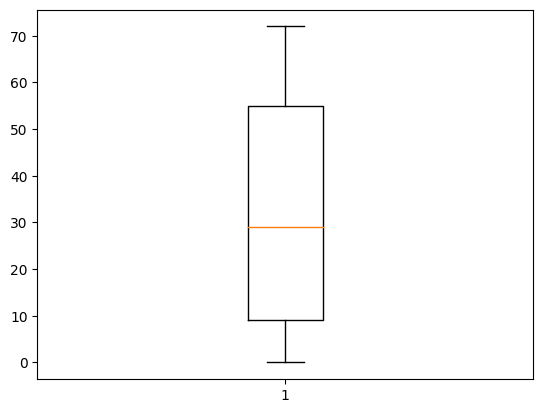

In [ ]:
# pencilan pada tenure
print(dataset['tenure'].unique())

plt.boxplot(dataset["tenure"])
# dapat dilihat bahwa kolom tenure tidak mengandung outliers(pencilan).

MonthlyCharges
18.25      534.700
18.40     1057.850
18.55      689.000
18.70      694.675
18.75       53.150
            ...   
118.20    8547.150
118.35    7804.150
118.60    7677.875
118.65    8477.600
118.75    8672.450
Name: TotalCharges, Length: 1585, dtype: float64


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

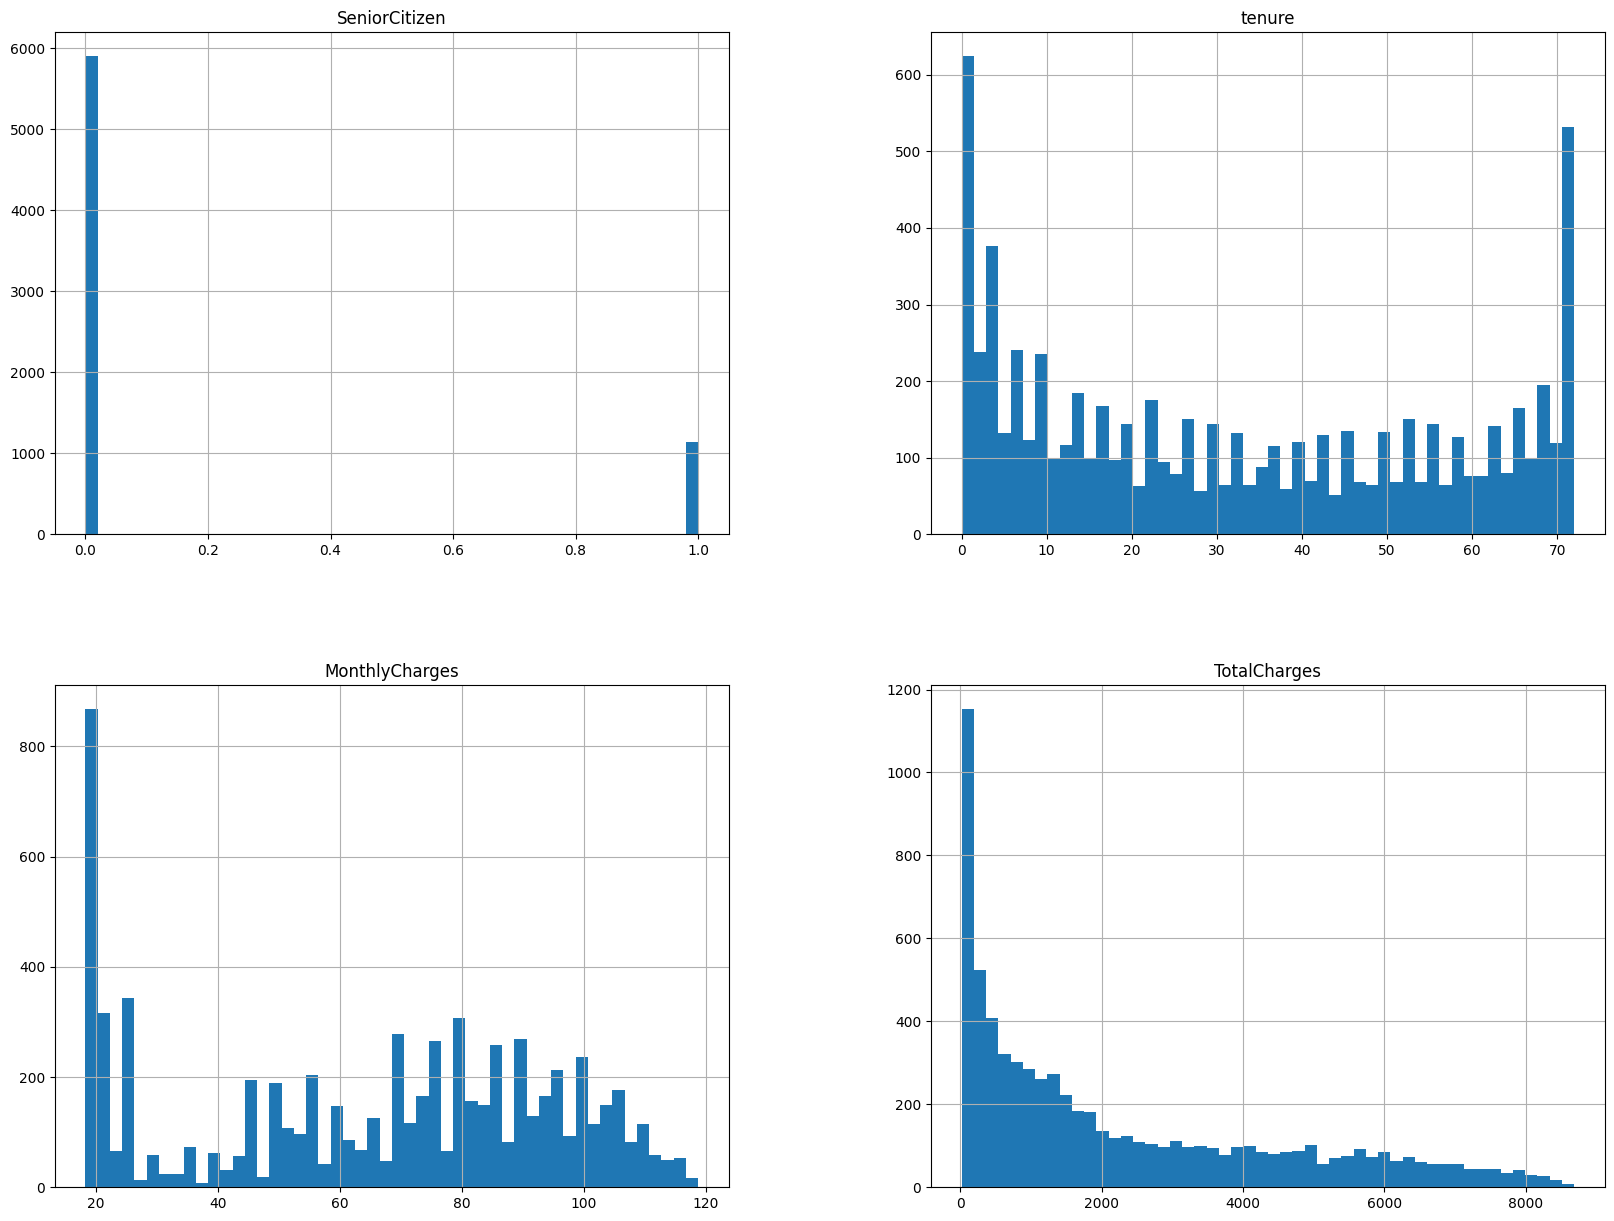

In [ ]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
mean_total_charges = dataset.groupby('MonthlyCharges')['TotalCharges'].mean()

print(mean_total_charges)
dataset.hist(bins=50, figsize=(20,15))

In [ ]:
def tf(column):
  Q1 = dataset[column].quantile(0.25)
  Q3 = dataset[column].quantile(0.75)
  IQR = Q3 - Q1
  z = 1.5
  lower_fence = Q1 - z * IQR
  upper_fence = Q3 + z * IQR
  outliers = dataset[(dataset[column] < lower_fence) | (dataset[column] > upper_fence)]

  return outliers

numeric_columns = dataset.select_dtypes(include=['int64','float64']).columns
outliers_list = []

for column in numeric_columns:
  outliers = tf(column)
  outliers_list.append(outliers)

outliers_dataset = pd.concat(outliers_list)

print("Outliers Turkey's Fence :")
print(outliers_dataset)


Outliers Turkey's Fence :
      "customerID  gender  SeniorCitizen Partner Dependents  tenure  \
20    "8779-QRDMV    Male              1      No         No       1   
30    "3841-NFECX  Female              1     Yes         No      71   
31    "4929-XIHVW    Male              1     Yes         No       2   
34    "3413-BMNZE    Male              1      No         No       1   
50    "8012-SOUDQ  Female              1      No         No      43   
...           ...     ...            ...     ...        ...     ...   
7023  "1035-IPQPU  Female              1     Yes         No      63   
7029  "2235-DWLJU  Female              1      No         No       6   
7031  "3605-JISKB    Male              1     Yes         No      55   
7032  "6894-LFHLY    Male              1      No         No       1   
7041  "8361-LTMKD    Male              1     Yes         No       4   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
20             No  No phone service           

In [ ]:
len(outliers_dataset)

1142